# `matplotlib` plot `Shapely` objects

## Imports

In [1]:
from shapely.geometry import (
    Point, LineString, Polygon,
    MultiPoint, MultiLineString, MultiPolygon, GeometryCollection
)

import matplotlib.pyplot as plt

## Data

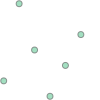

In [2]:
points = MultiPoint(
    [
        Point(-2, 4),
        Point(-3, 2),
        Point(-4, 5),
        Point(-1, 6),
        Point(-6, 3),
        Point(-5, 8)
    ]
)

points

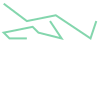

In [3]:
lines = MultiLineString(
    [
        LineString([(2, 7), (6, 4), (11, 5), (17, 1), (18, 4)]),
        LineString([(10, 4), (12, 1), (8, 2), (7, 3), (2, 2), (3, 1), (6, 1)]),
    ]
)

lines

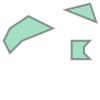

In [4]:
polygons = MultiPolygon(
    [
        Polygon([(6, -3), (10, -5), (5, -7), (3, -9), (2, -7), (3, -5)]),
        Polygon([(16, -1), (17, -4), (12, -2)]),
        Polygon(
            [(13, -7), (16, -7), (15, -8), (15, -9), (16, -10), (13, -10)]
        )
    ]
)

polygons

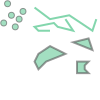

In [5]:
all_geoms = GeometryCollection(
    [points, lines, polygons]
)

all_geoms

## Plot

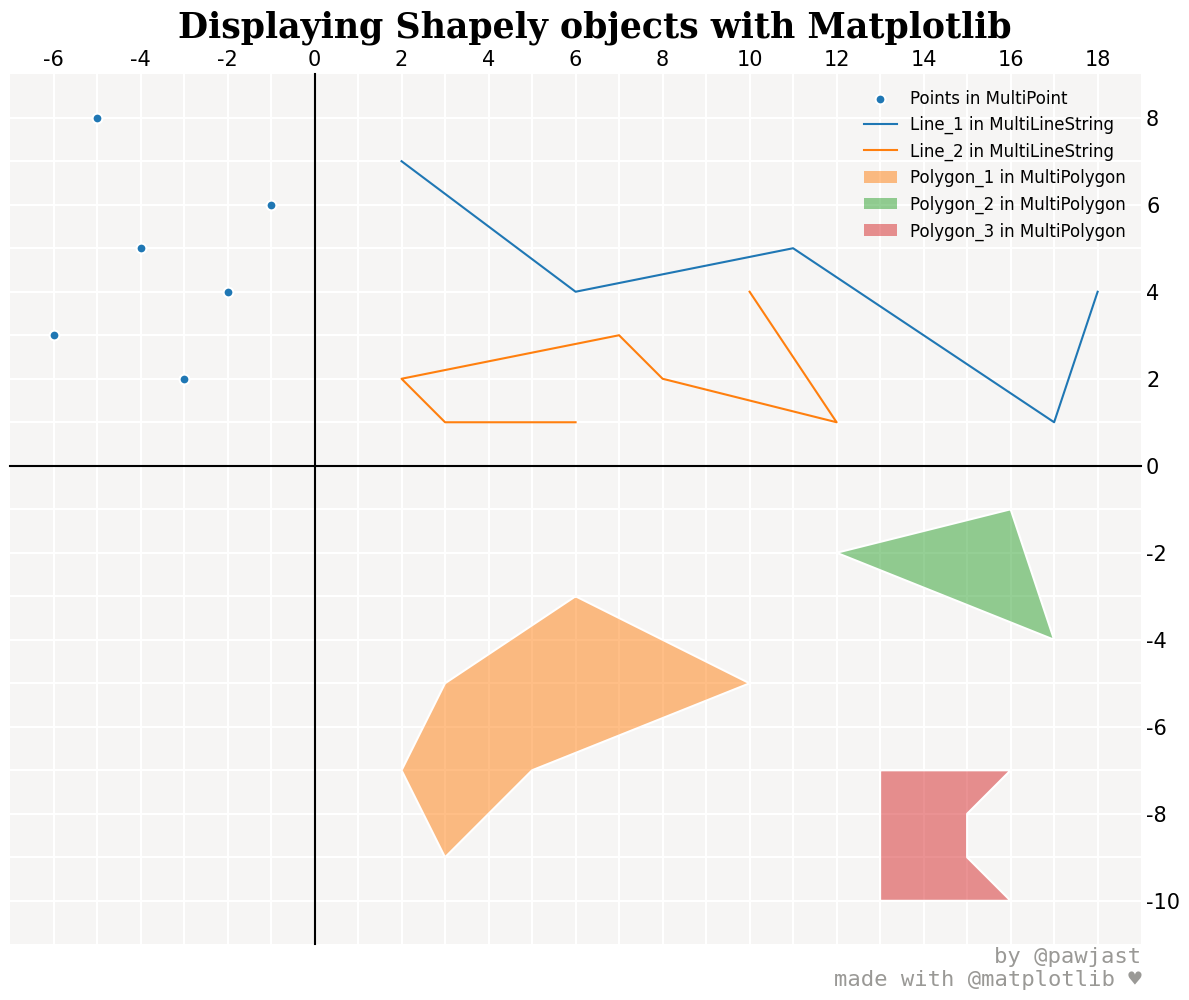

In [6]:
# settings
line_width_val = 1.5

fig, ax = plt.subplots(
    figsize=(12,10),
    facecolor="white"
)
fig.suptitle(
    "Displaying Shapely objects with Matplotlib",
    fontsize=25,
    fontfamily="serif",
    weight="bold"
)
ax.set_aspect("equal")
ax.set_facecolor("#f6f5f4")

# Points
ax.scatter(
    x=[p.x for p in points.geoms],
    y=[p.y for p in points.geoms],
    marker="o",
    edgecolor="white",
    linewidth=line_width_val,
    s=50,
    linewidths=1,
    label="Points in MultiPoint"
)

# Lines
for i, line in enumerate(lines.geoms, start=1):
    ax.plot(
        *line.xy,
        linewidth=line_width_val,
        label=f"Line_{i} in MultiLineString"
    )

# Polygons
for i, poly in enumerate(polygons.geoms, start=1):
    ax.plot(
        *poly.exterior.xy,
        color="white",
        linewidth=line_width_val
    )
    ax.fill(
        *poly.exterior.xy,
        alpha=0.5,
        label=f"Polygon_{i} in MultiPolygon"
    )

# Set `x` and `y` axis limits
ax.set_xlim(-7, 19)
ax.set_ylim(-11, 9)
# Set axis tick position and labels
ax.set_xticks(range(-6, 19))
ax.set_xticklabels([f"{x}" if x%2==0 else "" for x in range(-6, 19)])
ax.set_yticks(range(-10, 9))
ax.set_yticklabels([f"{y}" if y%2==0 else "" for y in range(-10, 9)])
# Set position of the tick labels
ax.xaxis.set_ticks_position("top")
ax.yaxis.set_ticks_position("right")
# Hide tick lines and update ticks label size
ax.tick_params(
    which="both",
    length=0,
    labelsize=15
)

# Hide some spines
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)
# Update spines thickness and move them to the center
for position in ["bottom", "left"]:
    ax.spines[position].set_position("zero")
    ax.spines[position].set_linewidth(1.5)

ax.grid(
    color="white",
    linewidth=line_width_val
)
ax.set_axisbelow(True)
ax.legend(
    frameon=False,
    fontsize=12
)

# Footer
ax.text(
    1, -0.0525,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

plt.tight_layout()

# plt.savefig(
#     fname="1.png",
#     format="png",
#     dpi=125
# );